In [ ]:
import os
import torch.backends.cudnn as cudnn
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')
from models.cifar10_autoencoder import CIFAR10Autoencoder
from trainers.autoencoder_trainer import AutoencoderTrainer
from models.cifar10_classifier import CIFAR10Classifier
from trainers.classifier_trainer import ClassifierTrainer
data_path = "/datasets/cv_datasets/data"
seed = 42 

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
cudnn.deterministic = True
cudnn.benchmark = False

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])
val_transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root=data_path, train=True, download=True, transform=train_transform)
val_dataset   = datasets.CIFAR10(root=data_path, train=False, download=True, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
autoencoder_l1_loss = CIFAR10Autoencoder(latent_dim=128)
autoencoder_trainer = AutoencoderTrainer(
    model=autoencoder_l1_loss,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=torch.nn.L1Loss(),
    device='cuda',
    lr=5e-4,
    patience=20,
    num_epochs=150,
    weight_decay=1e-5,
    scheduler_type="plateau",
    step_size=10,
    gamma=0.1,
    T_max=150  # if using cosine
)
autoencoder_trainer.train()
autoencoder_trainer.plot_metrics()

/home/tomersolomon/miniconda3/envs/aes/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1] - Train Loss: 0.1002, Val Loss: 0.0747
              Train L1: 0.1002,  Val L1: 0.0747
Epoch [2] - Train Loss: 0.0653, Val Loss: 0.0622
              Train L1: 0.0653,  Val L1: 0.0622
Epoch [3] - Train Loss: 0.0583, Val Loss: 0.0581
              Train L1: 0.0583,  Val L1: 0.0581
Epoch [4] - Train Loss: 0.0549, Val Loss: 0.0581
              Train L1: 0.0549,  Val L1: 0.0581
Epoch [5] - Train Loss: 0.0529, Val Loss: 0.0543
              Train L1: 0.0529,  Val L1: 0.0543
Epoch [6] - Train Loss: 0.0518, Val Loss: 0.0531
              Train L1: 0.0518,  Val L1: 0.0531
Epoch [7] - Train Loss: 0.0510, Val Loss: 0.0526
              Train L1: 0.0510,  Val L1: 0.0526
Epoch [8] - Train Loss: 0.0507, Val Loss: 0.0527
              Train L1: 0.0507,  Val L1: 0.0527
Epoch [9] - Train Loss: 0.0502, Val Loss: 0.0522
              Train L1: 0.0502,  Val L1: 0.0522
Epoch [10] - Train Loss: 0.0499, Val Loss: 0.0517
              Train L1: 0.0499,  Val L1: 0.0517
Epoch [11] - Train Loss: 0.04

In [ ]:
classifier2 = CIFAR10Classifier(latent_dim=128, num_classes=10)
classifier_trainer2 = ClassifierTrainer(
encoder=autoencoder_l1_loss.encoder,
classifier=classifier2,
train_loader=train_loader,
val_loader=val_loader,
num_epochs=150,
lr=1e-4,
patience=5,
scheduler_type="plateau",
step_size=10,
gamma=0.1,
T_max=150  # if using cosine
)
classifier_trainer2.train() 
print("Autoencoder training done.")
classifier_trainer2.plot_metrics()

Epoch [1] - TrainAcc: 0.2393, ValAcc: 0.3488 | ValLoss: 1.8900
Epoch [2] - TrainAcc: 0.3203, ValAcc: 0.3879 | ValLoss: 1.7621
Epoch [3] - TrainAcc: 0.3459, ValAcc: 0.4062 | ValLoss: 1.6889
Epoch [4] - TrainAcc: 0.3641, ValAcc: 0.4186 | ValLoss: 1.6416
Epoch [5] - TrainAcc: 0.3760, ValAcc: 0.4338 | ValLoss: 1.5950
Epoch [6] - TrainAcc: 0.3876, ValAcc: 0.4443 | ValLoss: 1.5643
Epoch [7] - TrainAcc: 0.3927, ValAcc: 0.4529 | ValLoss: 1.5388
Epoch [8] - TrainAcc: 0.4039, ValAcc: 0.4534 | ValLoss: 1.5197
Epoch [9] - TrainAcc: 0.4063, ValAcc: 0.4601 | ValLoss: 1.4994
Epoch [10] - TrainAcc: 0.4150, ValAcc: 0.4685 | ValLoss: 1.4819
Epoch [11] - TrainAcc: 0.4187, ValAcc: 0.4706 | ValLoss: 1.4671
Epoch [12] - TrainAcc: 0.4220, ValAcc: 0.4760 | ValLoss: 1.4545
Epoch [13] - TrainAcc: 0.4280, ValAcc: 0.4813 | ValLoss: 1.4365
Epoch [14] - TrainAcc: 0.4302, ValAcc: 0.4870 | ValLoss: 1.4253
Epoch [15] - TrainAcc: 0.4335, ValAcc: 0.4898 | ValLoss: 1.4182
Epoch [16] - TrainAcc: 0.4342, ValAcc: 0.4939 | V

KeyboardInterrupt: 

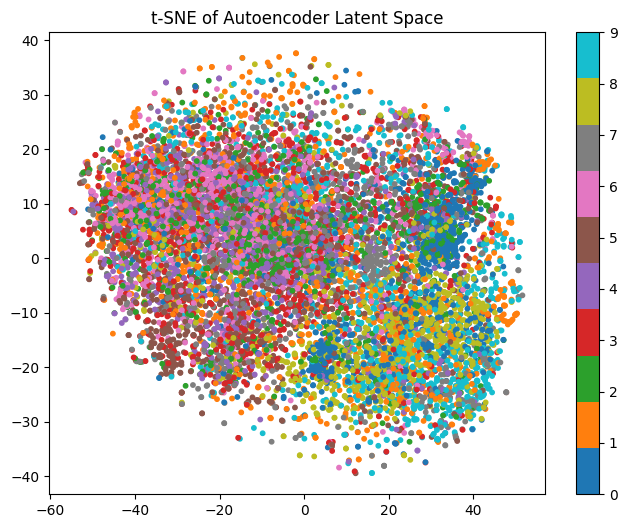

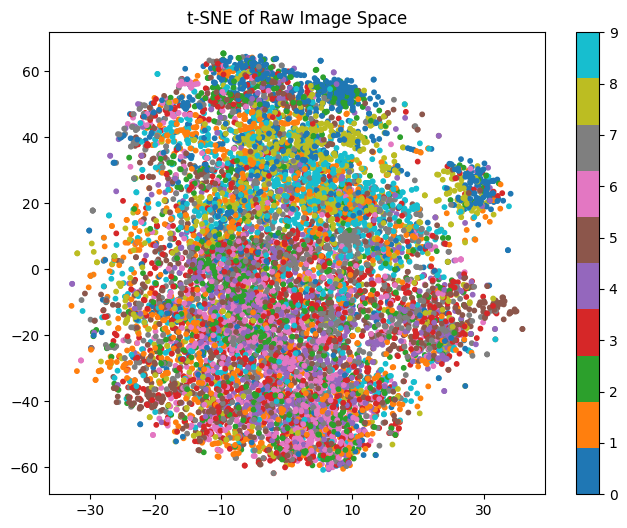

In [ ]:
from utils import plot_tsne_autoencoder
plot_tsne_autoencoder(autoencoder_l1_loss, val_loader, device='cuda')